In [31]:
from random_search import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import log_loss

## Load and prepare data

In [32]:
df = pd.read_csv('data/framingham.csv')
df = df.dropna()

In [33]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Train-test split

In [46]:
df_train = df.sample(frac=0.8)
df_valid = df.drop(df_train.index)

In [47]:
X_train = df_train[['male', 'age', 'education', 'currentSmoker',
                    'cigsPerDay', 'BPMeds', 'prevalentStroke', 
                    'prevalentHyp', 'diabetes', 'totChol', 
                    'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
                   ]].to_numpy()
y_train = df_train['TenYearCHD'].to_numpy()


# 'sysBP','diaBP' , 'education','prevalentHyp',


X_valid = df_valid[['male', 'age', 'education', 'currentSmoker',
                    'cigsPerDay', 'BPMeds', 'prevalentStroke', 
                    'prevalentHyp', 'diabetes', 'totChol', 
                    'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'
                   ]].to_numpy()
y_valid = df_valid['TenYearCHD'].to_numpy()

In [48]:
#X_train = np.c_[np.ones((y_train.shape[0], 1)), X_train]
#X_valid = np.c_[np.ones((y_valid.shape[0], 1)), X_valid]

In [49]:
X_train.shape

(2925, 15)

In [50]:
w, losses, valid_losses = random_search(30, X_train, y_train, X_valid, y_valid, 1e-5, 1e-5, log_loss)

loss_w = 0.6931471805599453
loss_w = 0.44287832971581814
loss_w = 0.44007155301519213


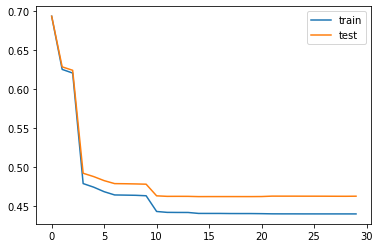

In [51]:
plt.plot(list(range(30)), losses, label = 'train')
plt.plot(list(range(30)), valid_losses, label = 'test')
plt.legend()

In [18]:
w, losses, valid_losses = random_search(30, X_train, y_train, X_valid, y_valid, 1e-5, 1e-2, log_loss)

loss_w = 0.6931471805599453
loss_w = 0.468253763810323
loss_w = 0.4649761296509121


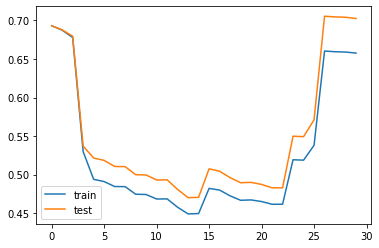

In [19]:
plt.plot(list(range(30)), losses, label = 'train')
plt.plot(list(range(30)), valid_losses, label = 'test')
plt.legend()

In [23]:
preds = (X_valid.dot(w))
np.where(preds>=0.5)

(array([], dtype=int64),)

In [41]:
w, losses, valid_losses = random_search(300, X_train, y_train, X_valid, y_valid, gamma=0.00001, m=0.0001, loss=log_loss)

loss_w = 0.6931471805599453
loss_w = 0.44586998863500504
loss_w = 0.44337927437600966
loss_w = 0.44340249597727244
loss_w = 0.443267403425469
loss_w = 0.4432184613310446
loss_w = 0.44312942314285536
loss_w = 0.44307362245781745
loss_w = 0.443040033557233
loss_w = 0.4430240394022444
loss_w = 0.4430396450385923
loss_w = 0.4429005659410955
loss_w = 0.44286578221322437
loss_w = 0.4428358613078078
loss_w = 0.4428218394779127
loss_w = 0.44276267406265446
loss_w = 0.4427291078147483
loss_w = 0.44267974142328526
loss_w = 0.4426617404291571
loss_w = 0.442611598129703
loss_w = 0.442638476409838
loss_w = 0.4425721385859044
loss_w = 0.4424961290534843
loss_w = 0.4425469060577792
loss_w = 0.44245021360125525
loss_w = 0.44246331728446364
loss_w = 0.4424169680737335
loss_w = 0.44238008312592614
loss_w = 0.44233501144372933
loss_w = 0.442309786871651


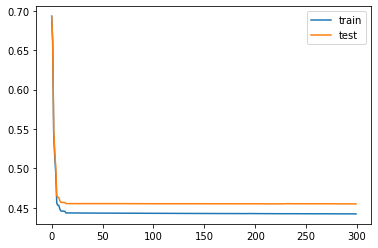

In [42]:
plt.plot(list(range(300)), losses, label = 'train')
plt.plot(list(range(300)), valid_losses, label = 'test')
plt.legend()

In [14]:
w = np.zeros(X_train.shape[1])
pred = sigmoid(X_train.dot(w))
m = 0.0001
gamma = 0.00001

In [63]:
#neg_loglikelihood(y_train, X_train, w)
(1-y_train).dot(np.log(1 - pred)) + y_train.dot(np.log(pred))

-2280.4542240422206

In [54]:
(1-y_train).dot(np.log(1 - pred)) + y_train.dot(np.log(pred))
grad, loss_w = estimate_gradient(w, X_train, y_train, m, neg_loglikelihood)
w = w - gamma * grad

In [88]:
from sklearn.metrics import log_loss

In [64]:
log_loss(y_train, pred)

0.6931471805599452

In [70]:
w = np.zeros(X_train.shape[1])
grad, loss_w = estimate_gradient_1(w, X_train, y_train, m, None)
w = w - gamma * grad

In [69]:
def estimate_gradient_1(w, X_train, y_train, m, loss):
    
    u = np.random.normal(size = w.shape)
    
    pred_w = sigmoid(X_train.dot(w))
    pred_u = sigmoid(X_train.dot(w+m*u))
    
    loss_w = log_loss(y_train, pred_w)
    loss_u = log_loss(y_train, pred_u)
    
    grad_est = (loss_u - loss_w) * u / m
    return grad_est, loss_w 

In [71]:
w

array([-4.71343541e-05, -2.13974333e-04,  7.80616248e-05,  1.13669783e-05,
       -9.00583019e-05,  1.41814181e-04,  6.82746049e-05])

In [72]:
loss_w

0.6931471805599452

In [19]:
log_loss(y_train[9:21], pred[9:21])

0.6931471805599453

In [20]:
pred[9:11]

array([0.5, 0.5])

In [53]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [54]:
model = SGDClassifier(loss = 'log', verbose=2, fit_intercept = False, learning_rate = 'constant', eta0 = 0.00001)#, max_iter=1000)

In [55]:
model.fit(X_train, y_train)

-- Epoch 1
Norm: 0.02, NNZs: 15, Bias: 0.000000, T: 2925, Avg. loss: 0.467676
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 15, Bias: 0.000000, T: 5850, Avg. loss: 0.460283
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 15, Bias: 0.000000, T: 8775, Avg. loss: 0.450147
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.05, NNZs: 15, Bias: 0.000000, T: 11700, Avg. loss: 0.451233
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 15, Bias: 0.000000, T: 14625, Avg. loss: 0.450626
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 15, Bias: 0.000000, T: 17550, Avg. loss: 0.443984
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.06, NNZs: 15, Bias: 0.000000, T: 20475, Avg. loss: 0.449493
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.07, NNZs: 15, Bias: 0.000000, T: 23400, Avg. loss: 0.449129
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.07, NNZs: 15, Bias: 0.000000, T: 26325, Avg. loss: 0.443334
Total traini

SGDClassifier(eta0=1e-05, fit_intercept=False, learning_rate='constant',
              loss='log', verbose=2)

In [43]:
w = model.coef_

In [46]:
pred = sigmoid(X_train.dot(w.T))

In [47]:
log_loss(y_train, pred)

0.5546314430708